# STC 510 Module 3 Python Data Transformation Essential
### By Marisa Boyd

For this assignment, we are continuing on the work that was done for the basics section of this module. An additional data source is to be imported and compared to the crime data, a scatter plot and bar chart should be produced, and the data needs to be placed into a google drive to be reviewed.

To start this assignment, the following libraries are imported to be used throughout the analysis of this data.

In [30]:
#Library Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import and Process Crime data

In [2]:
#Import crimestat csv file with error_bad_lines=False
crimestat = pd.read_csv("crimestat (1).csv", encoding= "utf8", engine= "python", error_bad_lines=False)

/var/folders/56/2cm42rxn033c_4hqgns4gl5m0000gn/T/ipykernel_32215/3978119381.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  crimestat = pd.read_csv("crimestat (1).csv", encoding= "utf8", engine= "python", error_bad_lines=False)
Skipping line 131678: unexpected end of data


In [3]:
#Display first five rows of data in dataframe
crimestat.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


In [4]:
#Display shape of dataframe
crimestat.shape

(131676, 7)

In [5]:
#Display dataframe info
crimestat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131676 entries, 0 to 131675
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INC NUMBER          131676 non-null  object 
 1   OCCURRED ON         131360 non-null  object 
 2   OCCURRED TO         93174 non-null   object 
 3   UCR CRIME CATEGORY  131676 non-null  object 
 4   100 BLOCK ADDR      131676 non-null  object 
 5   ZIP                 131673 non-null  float64
 6   PREMISE TYPE        130919 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


In [6]:
#Display count for each value in feature (Not Normalized)
crimestat["UCR CRIME CATEGORY"].value_counts()

LARCENY-THEFT                            66216
BURGLARY                                 23647
MOTOR VEHICLE THEFT                      14391
DRUG OFFENSE                              9572
AGGRAVATED ASSAULT                        9306
ROBBERY                                   5640
RAPE                                      1981
ARSON                                      634
MURDER AND NON-NEGLIGENT MANSLAUGHTER      289
Name: UCR CRIME CATEGORY, dtype: int64

In [7]:
#Display count of unique values in each feature
crimestat.nunique()

INC NUMBER            131672
OCCURRED ON            83137
OCCURRED TO            66575
UCR CRIME CATEGORY         9
100 BLOCK ADDR         29254
ZIP                       98
PREMISE TYPE              93
dtype: int64

In [33]:
#Display count for each value in feature (Not Normalized)
crimestat["ZIP"].value_counts()

#Saved into its own datframe to be used for visualizations
crimestat_zip_count = crimestat["ZIP"].value_counts()

#Display results
print(crimestat_zip_count)

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
           ... 
85203.0       1
85266.0       1
85381.0       1
85268.0       1
85212.0       1
Name: ZIP, Length: 98, dtype: int64


In [40]:
#Convert Series into Dataframe
crimestat_zip_count_df = crimestat_zip_count.to_frame()

#Reset Index 
crimestat_zip_count_df.reset_index(inplace=True)

#Rename Columns
crimestat_zip_count_df = crimestat_zip_count_df.rename(columns = {'index':'ZIP', 'ZIP':'Crime Count'})

crimestat_zip_count_df.head()

,ZIP,Crime Count
0,85015.0,6963
1,85008.0,6320
2,85009.0,5513
3,85041.0,5477
4,85051.0,5389


In [11]:
#Display count for each value in feature (Normalized)
crimestat["ZIP"].value_counts(normalize=True)

85015.0    0.052881
85008.0    0.047998
85009.0    0.041869
85041.0    0.041595
85051.0    0.040927
             ...   
85203.0    0.000008
85266.0    0.000008
85381.0    0.000008
85268.0    0.000008
85212.0    0.000008
Name: ZIP, Length: 98, dtype: float64

In [48]:
#Group data by ZIP and save into new dataframe
crimestat_zip = crimestat.groupby(["ZIP"])


#Save count results into new dataframe for visuals
crimestat_zip_by_category_count = crimestat_zip["UCR CRIME CATEGORY"].value_counts()

print(crimestat_zip_by_category_count)

ZIP      UCR CRIME CATEGORY 
85003.0  LARCENY-THEFT          758
         DRUG OFFENSE           194
         BURGLARY               179
         MOTOR VEHICLE THEFT    128
         AGGRAVATED ASSAULT     120
                               ... 
85395.0  AGGRAVATED ASSAULT       1
         RAPE                     1
85396.0  LARCENY-THEFT            2
         BURGLARY                 1
         MOTOR VEHICLE THEFT      1
Name: UCR CRIME CATEGORY, Length: 561, dtype: int64


In [49]:
type(crimestat_zip_by_category_count)

pandas.core.series.Series

In [58]:
#Convert Series into Dataframe
crimestat_zip_by_category_count_df = crimestat_zip_by_category_count.to_frame()

#Rename UCR CRIME CATTEGORY 
crimestat_zip_by_category_count_df = crimestat_zip_by_category_count_df.rename(columns = {'UCR CRIME CATEGORY':'Crime Count'})

#Reset index (creates ZIP and UCR CRIME CATEGORY Columns in dataframe)
crimestat_zip_by_category_count_df.reset_index(inplace=True)

#Display first five rows of dataframe
crimestat_zip_by_category_count_df.head()

,ZIP,UCR CRIME CATEGORY,Crime Count
0,85003.0,LARCENY-THEFT,758
1,85003.0,DRUG OFFENSE,194
2,85003.0,BURGLARY,179
3,85003.0,MOTOR VEHICLE THEFT,128
4,85003.0,AGGRAVATED ASSAULT,120


There are 98 different zip codes within this table. These zip codes will be compared to those found within the other data set to see if salary is related to crime rate. It will also be interesting to see what type of crimes are commited within the different zipcodes in comparison to salary.

### Import and Process Salary Data

In [14]:
#Import crimestat csv file with error_bad_lines=False
salary_zip = pd.read_csv("free-zipcode-database.csv")

/var/folders/56/2cm42rxn033c_4hqgns4gl5m0000gn/T/ipykernel_32215/4112301125.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  salary_zip = pd.read_csv("free-zipcode-database.csv")


In [15]:
#Display first five rows of data in dataframe
salary_zip.head()

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,1,704,STANDARD,PARC PARQUE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Parc Parque, PR",NA-US-PR-PARC PARQUE,False,NaN,NaN,NaN,NaN
1,2,704,STANDARD,PASEO COSTA DEL SUR,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Paseo Costa Del Sur, PR",NA-US-PR-PASEO COSTA DEL SUR,False,NaN,NaN,NaN,NaN
2,3,704,STANDARD,SECT LANAUSSE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Sect Lanausse, PR",NA-US-PR-SECT LANAUSSE,False,NaN,NaN,NaN,NaN
3,4,704,STANDARD,URB EUGENE RICE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Urb Eugene Rice, PR",NA-US-PR-URB EUGENE RICE,False,NaN,NaN,NaN,NaN
4,5,704,STANDARD,URB GONZALEZ,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Urb Gonzalez, PR",NA-US-PR-URB GONZALEZ,False,NaN,NaN,NaN,NaN


In [16]:
#Filter dataframe on State = 'AZ' and save into a dataframe
salary_zip_az = salary_zip[salary_zip.State=='AZ'].copy()

#Display unique values in City field with related value count
salary_zip_az['City'].value_counts()

PHOENIX                  82
TUCSON                   56
SCOTTSDALE               20
MESA                     19
GLENDALE                 14
                         ..
CHILCHINBITO              1
BLACK MESA                1
BABY ROCK                 1
KAYENTA                   1
ARIZ CORRECTIONAL CTR     1
Name: City, Length: 506, dtype: int64

There are 82 different zip codes for the city of Phoenix. These will be taken out and placed into their own dataframe to be used in the analysis.

In [17]:
#Filter dataframe on City = 'PHOENIX' and save into a dataframe
salary_zip_az_phoenx = salary_zip_az[salary_zip_az.City=='PHOENIX'].copy()

#Change column name to match other dataframe
salary_zip_az_phoenx.rename(columns={'Zipcode': 'ZIP'}, inplace=True)

#Display first five rows of dataframe
salary_zip_az_phoenx.head()

,RecordNumber,ZIP,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
39883,39884,85001,PO BOX,PHOENIX,AZ,PRIMARY,33.45,-112.06,-0.31,-0.77,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,319.0,459.0,11856452.0,NaN
39884,39885,85002,PO BOX,PHOENIX,AZ,PRIMARY,33.45,-112.06,-0.31,-0.77,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,NaN,NaN,NaN,NaN
39885,39886,85003,STANDARD,PHOENIX,AZ,PRIMARY,33.45,-112.07,-0.31,-0.77,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,3178.0,4814.0,149827797.0,NaN
39886,39887,85004,STANDARD,PHOENIX,AZ,PRIMARY,33.44,-112.07,-0.31,-0.77,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,2034.0,2892.0,93573719.0,NaN
39887,39888,85005,PO BOX,PHOENIX,AZ,PRIMARY,33.44,-112.12,-0.31,-0.77,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,443.0,800.0,12334424.0,NaN


In [59]:
salary_zip_only_phoenx = salary_zip_az_phoenx.iloc[:,[1,18]]

salary_zip_only_phoenx.head()

,ZIP,TotalWages
39883,85001,11856452.0
39884,85002,NaN
39885,85003,149827797.0
39886,85004,93573719.0
39887,85005,12334424.0


### Join The Data Sets Together

In [62]:
crimestat_salary_zip = pd.merge(crimestat_zip_count_df, salary_zip_only_phoenx, on = "ZIP", how = "inner")

crimestat_salary_zip = crimestat_salary_zip.iloc[:,[2,3,4]]

crimestat_salary_zip.head()

,ZIP,Crime Count,TotalWages
0,85015.0,6963,406520963.0
1,85008.0,6320,546914938.0
2,85009.0,5513,334345465.0
3,85041.0,5477,675794485.0
4,85051.0,5389,464928453.0


In [63]:
crimestat_salary_zip.describe()

,ZIP,Crime Count,TotalWages
count,43.000000,43.000000,4.300000e+01
mean,85032.767442,2868.953488,4.822726e+08
std,22.212006,1797.479213,2.711852e+08
min,85003.000000,72.000000,5.801539e+07
25%,85016.500000,1280.000000,2.712277e+08
50%,85029.000000,2839.000000,4.522525e+08
75%,85043.500000,4188.500000,6.099523e+08
max,85087.000000,6963.000000,1.099981e+09


In [69]:
crimestat_salary_zip_category = pd.merge(crimestat_zip_by_category_count_df, salary_zip_only_phoenx, on = "ZIP", how = "inner")

crimestat_salary_zip_category.head()

,ZIP,UCR CRIME CATEGORY,Crime Count,TotalWages
0,85003.0,LARCENY-THEFT,758,149827797.0
1,85003.0,DRUG OFFENSE,194,149827797.0
2,85003.0,BURGLARY,179,149827797.0
3,85003.0,MOTOR VEHICLE THEFT,128,149827797.0
4,85003.0,AGGRAVATED ASSAULT,120,149827797.0


In [81]:
crimestat_salary = pd.merge(crimestat, salary_zip_az_phoenx, on = "ZIP", how = "inner")

crimestat_salary.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,RecordNumber,ZipCodeType,City,...,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,39912,STANDARD,PHOENIX,...,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,17887.0,30711.0,582499405.0,NaN
1,201500002147335,11/01/2015 00:01,11/07/2015 22:00,LARCENY-THEFT,110XX N 35TH AVE,85029.0,VEHICLE,39912,STANDARD,PHOENIX,...,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,17887.0,30711.0,582499405.0,NaN
2,201500002334281,11/01/2015 00:01,11/30/2015 00:00,MOTOR VEHICLE THEFT,17XX W DESERT COVE AVE,85029.0,PARKING LOT,39912,STANDARD,PHOENIX,...,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,17887.0,30711.0,582499405.0,NaN
3,201500002126247,11/01/2015 05:00,11/02/2015 16:00,BURGLARY,17XX W DESERT COVE AVE,85029.0,APARTMENT,39912,STANDARD,PHOENIX,...,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,17887.0,30711.0,582499405.0,NaN
4,201600000795753,11/01/2015 12:00,04/27/2016 12:00,BURGLARY,112XX N 19TH AVE,85029.0,RETAIL BUSINESS,39912,STANDARD,PHOENIX,...,0.55,NaN,US,"Phoenix, AZ",NA-US-AZ-PHOENIX,False,17887.0,30711.0,582499405.0,NaN


### Bar Graph of Data

<AxesSubplot: >

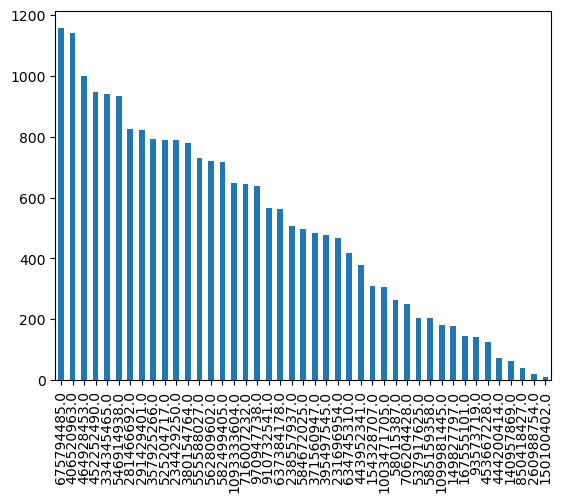

In [97]:
crimestat_salary[crimestat_salary["UCR CRIME CATEGORY"]=='BURGLARY']['TotalWages'].value_counts().plot.bar()

<AxesSubplot: >

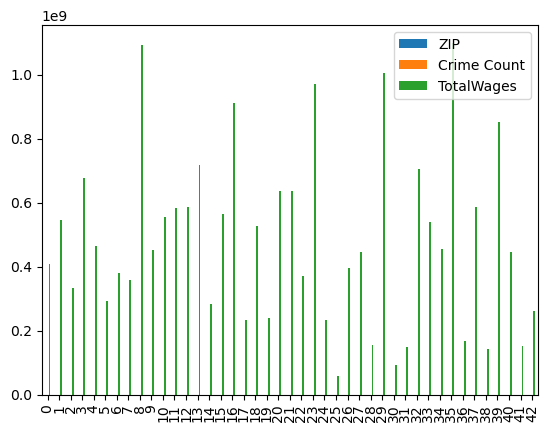

In [100]:
crimestat_salary_zip.plot.bar()

### Scatter Plot of Data

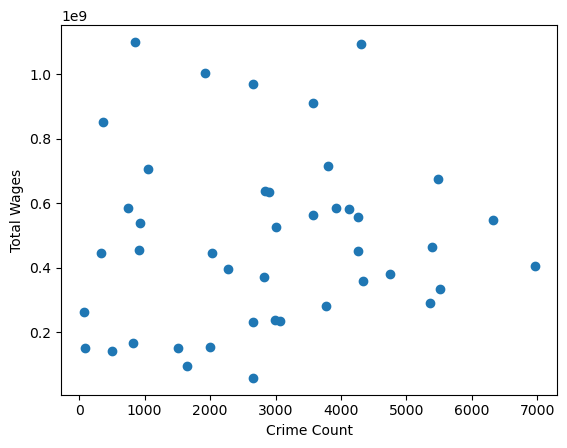

In [67]:
count = crimestat_salary_zip['Crime Count']
wages = crimestat_salary_zip.TotalWages
plt.scatter(count, wages)
matplotlib.pyplot.xlabel('Crime Count')
matplotlib.pyplot.ylabel('Total Wages')
plt.show()